In [1]:
import pandas as pd

In [74]:
df = pd.read_csv('../../db/news_2023_2025_similarity2.csv')
df.head()

,news_id,sim_news_id,wdate,title,summary,press,url,image,similarity
0,20250523_0002,20250523_0007,2025-05-23 18:00:00,[단독] 전자결제 강자 카카오페이 쓱·스마일 페이 인수 추진,23일 정보기술(IT)·투자은행(IB) 업계에 따르면 카카오페이가 SSG닷컴 쓱페이...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://ssl.pstatic.net/static.news/image/news...,0.701
1,20250523_0002,20250224_0128,2025-02-24 08:27:00,"카카오, 오픈AI 협력으로 커머스 가치↑…목표가 상향-키움",카카오가 커머스 사업부문 적정 가치를 기존 6조3000억원에서 7조1000억원으로 ...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2025/02/...,0.592
2,20250523_0002,20250120_0170,2025-01-20 07:41:00,"이마트, 변화로 실적 회복 가속화 기대-상상인",SSG닷컴 FI 교체 성공에 이어 CJ대한통운(000120)과의 물류 협업을 통한 ...,이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2025/01/...,0.588
3,20250523_0002,20250523_0011,2025-05-23 17:52:00,몸집 키우는 카카오…'간편결제 빅3' 흔드나,카카오페이가 신세계 이마트 측에서 쓱페이·스마일페이 인수를 추진하고 나선 건 국내 ...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/05/...,0.543
4,20250523_0002,20240228_0063,2024-02-28 16:16:00,카카오페이증권 새 수장에 신호철 카카오페이 부사장,28일 진행된페이증권 이사회에서 신호철 현 카카오페이 사업개발실장이 카카오페이증권 ...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,https://imgnews.pstatic.net/image/014/2024/02/...,0.516


In [75]:
import seaborn as sns

# 1. 윈도우 기본 한글 폰트 설정 (맑은 고딕 or 나눔고딕)
plt.rcParams["font.family"] = "Malgun Gothic"  # 또는 'NanumGothic'

# 2. 마이너스 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

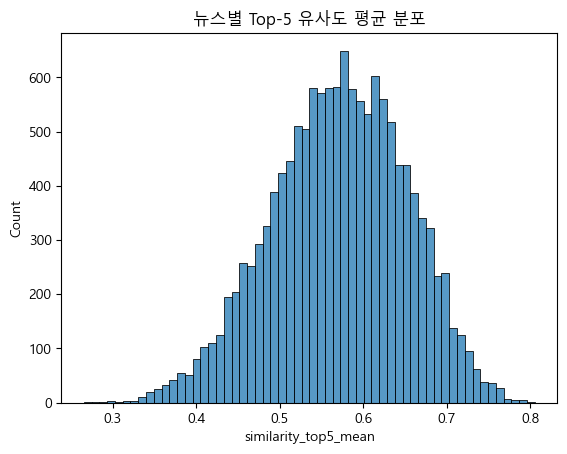

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. news_id별 similarity 평균 계산
grouped_df = df.groupby("news_id")["similarity"].mean().reset_index()

# 2. 히스토그램 시각화
sns.histplot(data=grouped_df, x="similarity")
plt.xlabel("similarity_top5_mean")
plt.title("뉴스별 Top-5 유사도 평균 분포")
plt.show()

In [77]:
grouped_df.describe()

,similarity
count,13720.000000
mean,0.570753
std,0.080669
min,0.265600
25%,0.516400
50%,0.573800
75%,0.628800
max,0.805400


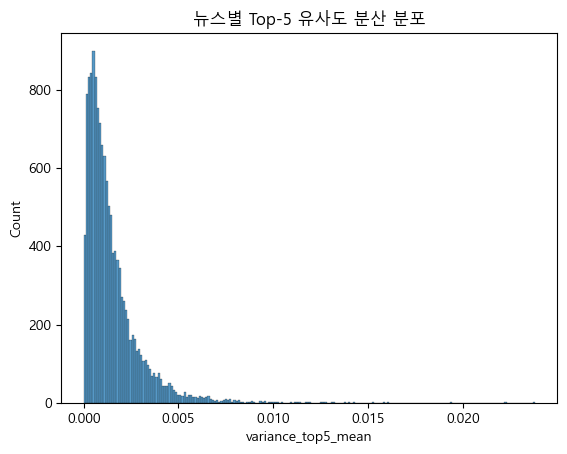

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. news_id별 similarity 평균 계산
grouped_df2 = df.groupby("news_id")["similarity"].var().reset_index()

# 2. 히스토그램 시각화
sns.histplot(data=grouped_df2, x="similarity")
plt.xlabel("variance_top5_mean")
plt.title("뉴스별 Top-5 유사도 분산 분포")
plt.show()

In [79]:
grouped_df2.describe()

,similarity
count,13720.000000
mean,0.001467
std,0.001448
min,0.000007
25%,0.000530
50%,0.001058
75%,0.001905
max,0.023802


In [73]:
import numpy as np
np.var([0.67, 0.58, 0.52, 0.44, 0.33])

np.float64(0.013576)

In [55]:
grouped_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)[100:110]

,news_id,similarity
100,20240723_0095,0.8060
101,20240801_0223,0.8058
102,20250123_0008,0.8056
103,20240621_0047,0.8056
104,20240116_0125,0.8052
105,20241017_0267,0.8050
106,20250212_0132,0.8050
107,20240205_0305,0.8050
108,20250305_0186,0.8042
109,20241004_0107,0.8042


In [58]:
bottom_20_news_ids = (
    grouped_df.sort_values(by="similarity", ascending=False)
    .reset_index(drop=True)
    .tail(20)
)['news_id'].tolist()

In [65]:
df[df["sim_news_id"] == "20250523_0076"]["summary"].reset_index(drop=True)[0]

'금융감독원 전자공시시스템에 따르면 텔코웨어의 금한태 대표는 지난 19일부터 자사주를 공개매수하고 있는데, 이는 상장폐지 요건을 충족하기 위한 것으로 보이며, 상장폐지는 주주가치 제고 명목으로 매입된 자사주가 사실상 상장폐지의 도구로 활용된 셈이다.'

In [64]:
df['similarity'].describe()

count    68600.000000
mean         0.632640
std          0.058187
min          0.578000
25%          0.585000
50%          0.612000
75%          0.663000
max          0.863000
Name: similarity, dtype: float64

In [63]:
df[df['similarity'] == df['similarity'].min()]

,news_id,sim_news_id,wdate,title,summary,press,url,image,similarity
73,20250523_0076,20240731_0081,2024-07-31 14:53:00,"락앤락 추가매수도 지지부진 … 어피너티, 자진 상장폐지 계획 어쩌나","당초 어피너티는 6월 12일까지 락앤락 보유지분을 86.38%까지 늘렸지만, 당초 ...",매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2024/07/...,0.578
74,20250523_0076,20241111_0211,2024-11-11 09:24:00,"이수페타시스, 대규모 유상증자에 19% 급락 [특징주]",지난 8일 장 마감 후 시설 자금과 타법인 증권 취득 자금을 위해 5500억원 규모...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,https://imgnews.pstatic.net/image/014/2024/11/...,0.578
91,20250523_0097,20240510_0257,2024-05-10 07:58:00,"엘앤에프, 하이니켈 경쟁력 통한 성장 기대…목표가 12%↑ -신한",신한투자증권은 10일 엘앤에프(066970)에 대해 1분기 실적이 과잉 재고 탓에 ...,이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2024/05/...,0.578
92,20250523_0097,20240926_0325,2024-09-26 07:22:00,"현대오토에버, 매력적인 모멘텀 여전히 유효-대신",현대오토에버는 올해 3분기 임금협상분 비용 반영으로 실적을 하향했으나 밸류 모멘텀을...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://ssl.pstatic.net/static.news/image/news...,0.578
93,20250523_0097,20241105_0262,2024-11-05 08:24:00,"대신證 ""한국타이어, 추세 상승 위해 주주환원 확대 필요""",대신증권은 5일 한국타이어앤테크놀로지 주가가 추세적으로 상승하기 위해선 주주환원 확...,연합뉴스,https://n.news.naver.com/mnews/article/001/001...,https://imgnews.pstatic.net/image/001/2024/11/...,0.578
...,...,...,...,...,...,...,...,...,...
68534,20240102_0337,20240813_0051,2024-08-13 16:08:00,"지에프씨생명과학, 코스닥 이전상장 기술성평가 ‘A’ 획득",대신증권은 LED 처리를 통한 캘러스 배양 방법 특허를 취득하는 등 기술 고도화에 ...,이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2024/08/...,0.578
68596,20240102_0413,20240723_0341,2024-07-23 07:44:00,"""밥캣 자회사로 두게 되는 두산…지배구조 개편 최고 수혜주""",두산밥캣을 두산로보틱스의 완전자회사로 만들어 상장폐지시킨 뒤 합병하는 방안이 나왔기...,한국경제,https://n.news.naver.com/mnews/article/015/000...,https://imgnews.pstatic.net/image/015/2024/07/...,0.578
68597,20240102_0413,20241129_0043,2024-11-29 15:44:00,"하이브 상장 때 4000억 따로 챙긴 방시혁…당국, 제재 여부 검토","방시혁 하이브 의장은 2020년 하이브 상장 전 스틱인베스트먼트, 이스톤에쿼티파트너...",한국경제,https://n.news.naver.com/mnews/article/015/000...,https://imgnews.pstatic.net/image/015/2024/11/...,0.578
68598,20240102_0413,20241211_0007,2024-12-11 18:37:00,"박대연 티맥스그룹 회장, 티맥스소프트서 손 뗀다",슈퍼앱 개발사인 티맥스에이앤씨 경영에 집중하기 위해 11일 투자은행(IB) 업계에 ...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2024/12/...,0.578


<Axes: xlabel='similarity', ylabel='Count'>

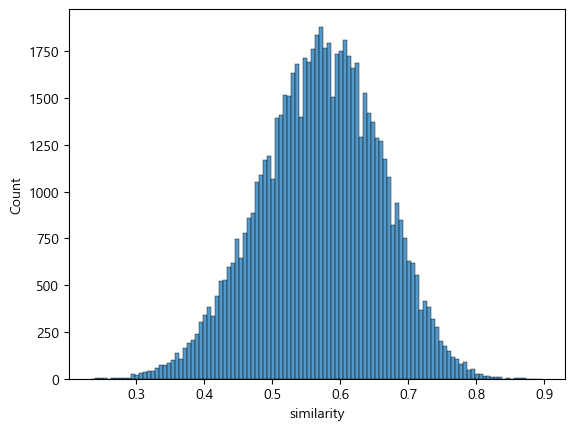

In [80]:
sns.histplot(df['similarity'])

In [81]:
df["similarity"].describe()

count    68600.000000
mean         0.570753
std          0.087639
min          0.234000
25%          0.512000
50%          0.573000
75%          0.633000
max          0.897000
Name: similarity, dtype: float64

In [60]:
df[df['news_id'].isin(bottom_20_news_ids)].reset_index(drop=True)[:50]

,news_id,sim_news_id,wdate,title,summary,press,url,image,similarity
0,20250416_0147,20240311_0335,2024-03-11 06:48:00,'주주친화' 호평 얻은 KT…'분기배당' 도입 본격화,KT는 오는 28일 정기 주주총회에서 분기 배당 도입을 위한 정관변경 안건을 의결할...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2024/03/...,0.578
1,20250416_0147,20240724_0295,2024-07-24 06:12:00,"KT, 실적 부진에도 현 시점 매수 적절-하나",하나증권은 24일 KT에 대해 실적 부진에도 현 시점에서 매수가 적절하다고 판단하고...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,https://imgnews.pstatic.net/image/014/2024/07/...,0.578
2,20250416_0147,20240801_0013,2024-08-01 18:12:00,"‘주주이익 환원’ KT, 통신 대장주 SKT 맹추격","주주이익 환원을 내세운 KT가 SK텔레콤을 빠르게 추격하고 있는 가운데, KT 주주...",파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,https://ssl.pstatic.net/static.news/image/news...,0.578
3,20250416_0147,20250103_0133,2025-01-03 07:47:00,"“KT, 올해 실적 기대해 볼 만…주가 5만5000원 가능할 것”",KT 로는 지난해 낮은 기저에 본사 인력 감축 효과에 따른 영업비용 감축 효과가 나...,매일경제,https://n.news.naver.com/mnews/article/009/000...,https://imgnews.pstatic.net/image/009/2025/01/...,0.578
4,20250416_0147,20250305_0067,2025-03-05 14:40:00,방경만 체제 KT&G 실적·주가 상승…증권사 목표가 14만원,KT&G는 방경만 사장 취임 후 주가와 실적이 모두 성장했다고 5일 밝혔으며 지난해...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2025/03/...,0.578
5,20250416_0148,20240119_0193,2024-01-19 08:15:00,"BGF리테일, 올해 실적 턴어라운드 전망…밸류 매력 부각-KB",KB증권 19일 BGF리테일에 대해 올해 실적이 턴어라운드 할 것이라는 기대감과 함...,이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2024/01/...,0.578
6,20250416_0148,20240508_0145,2024-05-08 10:02:00,"다올證 ""한국금융지주, 1분기 호실적... 이익 성장세 기대""",다올투자증권은 8일 한국금융지주에 대해 잔존 비용 부담에도 불구하고 이익 성장세 유...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,https://imgnews.pstatic.net/image/014/2024/05/...,0.578
7,20250416_0148,20240530_0295,2024-05-30 08:07:00,"삼성생명, 보험업계 불확실성에도 올해 주당배당금 상향 전망-NH",불확실한 시기 속 상대적으로 주주환원 불확실성이 낮다는 분석에 대해 삼성생명은 보험...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://ssl.pstatic.net/static.news/image/news...,0.578
8,20250416_0148,20240715_0265,2024-07-15 08:27:00,"""에이피알, 악재 충분히 반영한 주가…저점 매수 추천""-신한투자증권",신한투자증권은 에이피알의 주가가 올해 2~3분기 실적 우려에 따른 악재를 충분히 반...,머니투데이,https://n.news.naver.com/mnews/article/008/000...,https://imgnews.pstatic.net/image/008/2024/07/...,0.578
9,20250416_0148,20240819_0275,2024-08-19 08:11:00,"유안타증권, 배당 매력에 하반기 턴어라운드 전망-한투","한국투자증권은 19일 유안타증권(003470)에 대해 브로커리지, 트레이딩 손익과 ...",이데일리,https://n.news.naver.com/mnews/article/018/000...,https://imgnews.pstatic.net/image/018/2024/08/...,0.578
